In [1]:
!pip install pyspark
!pip install bnlp_toolkit
!pip install nlu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 3.9 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=72d1e255dc5dbb1376cbb7db96bb8bf7369f0ebe75378ec433cd881face54dd0
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark
  Obtaining dependency information for bnlp_toolkit from https://files.pythonhosted.org/packages/af/99/5d688fc2e5f6494d6c0a4e6bcdc8192266869caeef3b41dbc3dc8358616d/bnlp_toolkit-4.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for ftfy from https://files.pythonhosted.org/packages/91/f8/dfa32d06cfcbdb76bc46e0f5d69c537de33f4cedb1a15cd4746ab45a6a26/ftfy-6.1.3-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for wcwidth<0.3

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bnlp import BengaliCorpus as corpus
from bnlp import CleanText
from sklearn.feature_extraction.text import TfidfVectorizer
from bnlp import NLTKTokenizer
import nlu

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
train_df = pd.read_csv("/kaggle/input/sentnob-sentiment-analysis-in-noisy-bangla-texts/SentNoB Dataset/Train.csv")

In [4]:
train_df.head()

,Data,Label
0,মুগ্ধ হয়ে গেলাম মামু. আর তোমায় কি কমু. বলো তোম...,1
1,এই কুত্তার বাচ্চাদের জন্য দেশটা আজ এমন অবস্তায়...,2
2,ভাই আপনার কথাই যাদু রয়েছে,1
3,উওরটা আমার অনেক ভাল লেগেছে,1
4,আমার নিজের গাড়ী নিয়ে কি সাজেক যেতে পারবো না ?...,0


In [5]:
train_df.dropna(inplace=True)

In [6]:
longest_string = max(train_df["Data"], key=len)
print(len(longest_string))

372


In [7]:
clean_text = CleanText(
   fix_unicode=True,
   unicode_norm=True,
   unicode_norm_form="NFKC",
   remove_url=False,
   remove_email=False,
   remove_emoji=False,
   remove_number=False,
   remove_digits=False,
   remove_punct=False,
   replace_with_url="<URL>",
   replace_with_email="<EMAIL>",
   replace_with_number="<NUMBER>",
   replace_with_digit="<DIGIT>",
   replace_with_punct = "<PUNC>"
)

train_df['Data'] = train_df['Data'].apply(clean_text)

In [8]:
longest_string = max(train_df["Data"], key=len)
print(len(longest_string))

372


In [9]:
def create_lemma(text):
     return " ".join(text)

In [10]:
text_list = train_df["Data"].tolist()
lemmatized_result = nlu.load('bn.lemma').predict(text_list, output_level = "document")
lemmatized_result

:: loading settings :: url = jar:file:/opt/conda/lib/python3.10/site-packages/pyspark/jars/ivy-2.5.1.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /root/.ivy2/cache
The jars for the packages stored in: /root/.ivy2/jars
com.johnsnowlabs.nlp#spark-nlp_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-da9f22f2-f3fe-4bb3-9894-37f8b917167a;1.0
	confs: [default]
	found com.johnsnowlabs.nlp#spark-nlp_2.12;5.1.4 in central
	found com.typesafe#config;1.4.2 in central
	found org.rocksdb#rocksdbjni;6.29.5 in central
	found com.amazonaws#aws-java-sdk-bundle;1.11.828 in central
	found com.github.universal-automata#liblevenshtein;3.0.0 in central
	found com.google.protobuf#protobuf-java-util;3.0.0-beta-3 in central
	found com.google.protobuf#protobuf-java;3.0.0-beta-3 in central
	found com.google.code.gson#gson;2.3 in central
	found it.unimi.dsi#fastutil;7.0.12 in central
	found org.projectlombok#lombok;1.16.8 in central
	found com.google.cloud#google-cloud-storage;2.20.1 in central
	found com.google.guava#guava;31.1-jre in central
	found com.google.guava#failureaccess;1.0.1 

lemma download started this may take some time.
Approximate size to download 90.6 KB
[ | ]lemma download started this may take some time.
Approximate size to download 90.6 KB
Download done! Loading the resource.
[OK!]


,document,lem
0,মুগ্ধ হয়ে গেলাম মামু. আর তোমায় কি কমু. বলো ত...,"[মুগ্ধ, হয়ে, যাওয়া, মামু, ., আর, তোমায়, কি, ..."
1,এই কুত্তার বাচ্চাদের জন্য দেশটা আজ এমন অবস্তায...,"[এই, কুত্তার, বাচ্চা, জন্য, দেশটা, আজ, এমন, অব..."
2,ভাই আপনার কথাই যাদু রয়েছে,"[ভাই, আপনি, কথাই, যাদু, রয়েছে]"
3,উওরটা আমার অনেক ভাল লেগেছে,"[উওরটা, আমি, অনেক, ভাল, লাগা]"
4,আমার নিজের গাড়ী নিয়ে কি সাজেক যেতে পারবো না ...,"[আমি, নিজ, গাড়ী, নিয়ে, কি, সাজেক, যাওয়া, পার..."
...,...,...
12570,বর্ডারে অনেক লেট হয়ে যাওয়াতে আমরা জিপে করে চ...,"[বর্ডারে, অনেক, লেট, হয়ে, যাওয়াতে, আমি, জিপে..."
12571,আমার সোনার বাংলাতে এমন রক্ষক নামের ভক্ষকের কোন...,"[আমি, সোনা, বাংলাতে, এমন, রক্ষক, নাম, ভক্ষকের,..."
12572,ওনারা এত হাইজিনিক ও এত সুন্দর পরিবেশে রান্না ক...,"[ওনারা, এত, হাইজিনিক, ও, এত, সুন্দর, পরিবেশ, র..."
12573,বাংলাদেশ আমরা পুলিশ চাই না এই ধরনে পুলিশ দরকার...,"[বাংলাদেশ, আমি, পুলিশ, চাওয়া, না, এই, ধরনে, পু..."


In [11]:
# Extracting lemmatized text from the results
lemmatized_text_list = lemmatized_result['lem']

# Adding lemmatized text as a new column to train_df
train_df['Lemmatized_Text'] = lemmatized_text_list

train_df['Lemmatized_Text']=train_df['Lemmatized_Text'].apply(create_lemma)

In [12]:
train_df

,Data,Label,Lemmatized_Text
0,মুগ্ধ হয়ে গেলাম মামু. আর তোমায় কি কমু. বলো ত...,1,মুগ্ধ হয়ে যাওয়া মামু . আর তোমায় কি কমু . বলা...
1,এই কুত্তার বাচ্চাদের জন্য দেশটা আজ এমন অবস্তায...,2,এই কুত্তার বাচ্চা জন্য দেশটা আজ এমন অবস্তায় এ...
2,ভাই আপনার কথাই যাদু রয়েছে,1,ভাই আপনি কথাই যাদু রয়েছে
3,উওরটা আমার অনেক ভাল লেগেছে,1,উওরটা আমি অনেক ভাল লাগা
4,আমার নিজের গাড়ী নিয়ে কি সাজেক যেতে পারবো না ...,0,আমি নিজ গাড়ী নিয়ে কি সাজেক যাওয়া পারবো না ? ...
...,...,...,...
12570,বর্ডারে অনেক লেট হয়ে যাওয়াতে আমরা জিপে করে চ...,1,বর্ডারে অনেক লেট হয়ে যাওয়াতে আমি জিপে করা চল...
12571,আমার সোনার বাংলাতে এমন রক্ষক নামের ভক্ষকের কোন...,2,আমি সোনা বাংলাতে এমন রক্ষক নাম ভক্ষকের কোন জায...
12572,ওনারা এত হাইজিনিক ও এত সুন্দর পরিবেশে রান্না ক...,1,ওনারা এত হাইজিনিক ও এত সুন্দর পরিবেশ রান্না কর...
12573,বাংলাদেশ আমরা পুলিশ চাই না এই ধরনে পুলিশ দরকার...,2,বাংলাদেশ আমি পুলিশ চাওয়া না এই ধরনে পুলিশ দরকা...


In [13]:
longest_string = max(train_df["Lemmatized_Text"], key=len)
print(len(longest_string))

361


In [14]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Fit and transform the text data
tfidf_matrix = tfidf.fit_transform(train_df['Lemmatized_Text'])

# Get feature names (words)
feature_names = tfidf.get_feature_names_out()

# Create a DataFrame of TF-IDF scores
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Find mean TF-IDF score for each word across all documents
word_scores = tfidf_df.mean(axis=0)

# Set a threshold to identify less important words (adjust threshold as needed)
threshold = 0.00005 # For example, you can set a threshold value

# Get less important words based on threshold
less_important_words = word_scores[word_scores < threshold]

# Display words that will be removed
print("Less important words:")
print(less_important_words)

Less important words:
007            0.000041
01614000789    0.000046
01618804890    0.000046
01625959562    0.000043
01681003067    0.000034
                 ...   
৮৫             0.000028
৮৫৭            0.000046
৮৭             0.000047
৮৯             0.000028
৯৬             0.000041
Length: 863, dtype: float64


In [15]:
# Initialize tokenizer
bnltk = NLTKTokenizer()

# Function to remove less important words
def remove_less_important_words(text):
    words = bnltk.word_tokenize(text)
    filtered_words = [word for word in words if word not in less_important_words]
    return ' '.join(filtered_words)

# Apply the function to 'text' column in the DataFrame
train_df['Lemmatized_Text'] = train_df['Lemmatized_Text'].apply(remove_less_important_words)

In [16]:
longest_string = max(train_df["Lemmatized_Text"], key=len)
print(len(longest_string))

358


In [17]:
train_df["Label"].value_counts()

Label
1    5133
2    4548
0    2894
Name: count, dtype: int64

In [18]:
##For test dataset

In [19]:
test_df = pd.read_csv("/kaggle/input/sentnob-sentiment-analysis-in-noisy-bangla-texts/SentNoB Dataset/Test.csv")

In [20]:
test_df.head()

,Data,Label
0,"স্বাস্থ্যবান হতে চাই , আমি বয়সের তুলনায় অনেক ব...",0
1,ভাইয়া নতুন ভিডিও আসে না কেন,0
2,সৌরভ গাঙ্গুলী ছাড়া দাদাগিরি কখনো জমে উঠত না,0
3,ক্রিকেট কে বাচাতে হলে পাপকে অতিশিগ্রিই তাকেও গ...,2
4,আমিতো সেই ঝালপ্রিয়ো মানুষ,1


In [21]:
test_df.dropna(inplace=True)

In [22]:
longest_string = max(test_df["Data"], key=len)
print(len(longest_string))

320


In [23]:
clean_text = CleanText(
   fix_unicode=True,
   unicode_norm=True,
   unicode_norm_form="NFKC",
   remove_url=False,
   remove_email=False,
   remove_emoji=False,
   remove_number=False,
   remove_digits=False,
   remove_punct=False,
   replace_with_url="<URL>",
   replace_with_email="<EMAIL>",
   replace_with_number="<NUMBER>",
   replace_with_digit="<DIGIT>",
   replace_with_punct = "<PUNC>"
)

test_df['Data'] = test_df['Data'].apply(clean_text)

In [24]:
longest_string = max(test_df["Data"], key=len)
print(len(longest_string))

320


In [25]:
def create_lemma(text):
     return " ".join(text)

In [26]:
text_list = test_df["Data"].tolist()
lemmatized_result = nlu.load('bn.lemma').predict(text_list, output_level = "document")
lemmatized_result

lemma download started this may take some time.
Approximate size to download 90.6 KB
[OK!]


,document,lem
0,"স্বাস্থ্যবান হতে চাই , আমি বয়সের তুলনায় অনেক...","[স্বাস্থ্যবান, হতে, চাওয়া, ,, আমি, বয়সের, তুল..."
1,ভাইয়া নতুন ভিডিও আসে না কেন,"[ভাইয়া, নতুন, ভিডিও, আসা, না, কেন]"
2,সৌরভ গাঙ্গুলী ছাড়া দাদাগিরি কখনো জমে উঠত না,"[সৌরভ, গাঙ্গুলী, ছাড়া, দাদা, কখন, জমা, উঠত, না]"
3,ক্রিকেট কে বাচাতে হলে পাপকে অতিশিগ্রিই তাকেও গ...,"[ক্রিকেট, কে, বাচাতে, হওয়া, পাপকে, অতিশিগ্রিই,..."
4,আমিতো সেই ঝালপ্রিয়ো মানুষ,"[আমিতো, সেই, ঝালপ্রিয়ো, মানুষ]"
...,...,...
1581,ঐ পুলিশ কুওারবাচচাদের গুলিকরে মেরে ফেলা উচিত,"[ঐ, পুলিশ, কুওারবাচচাদের, গুলিকরে, মারা, ফেলা,..."
1582,খিচুড়ি পর্ব মারাত্মক । বাকি টা দেখি তারপর কমেন্ট,"[খিচুড়ি, পর্ব, মারাত্মক, ।, বাকি, টা, দেখা, ত..."
1583,পাশের ফ্রেন্ডটা কি ছেলে না মেয়ে,"[পাশ, ফ্রেন্ডটা, কি, ছেলে, না, মেয়ে]"
1584,মদ লকমান না খেলেও আমরা খাই এমনটাই মনে হচ্ছে,"[মদ, লকমান, না, খেলেও, আমি, খাওয়া, এমন, মন, হওয়া]"


In [27]:
# Extracting lemmatized text from the results
lemmatized_text_list = lemmatized_result['lem']

# Adding lemmatized text as a new column to train_df
test_df['Lemmatized_Text'] = lemmatized_text_list

test_df['Lemmatized_Text']=test_df['Lemmatized_Text'].apply(create_lemma)

In [28]:
test_df

,Data,Label,Lemmatized_Text
0,"স্বাস্থ্যবান হতে চাই , আমি বয়সের তুলনায় অনেক...",0,"স্বাস্থ্যবান হতে চাওয়া , আমি বয়সের তুলনায় অন..."
1,ভাইয়া নতুন ভিডিও আসে না কেন,0,ভাইয়া নতুন ভিডিও আসা না কেন
2,সৌরভ গাঙ্গুলী ছাড়া দাদাগিরি কখনো জমে উঠত না,0,সৌরভ গাঙ্গুলী ছাড়া দাদা কখন জমা উঠত না
3,ক্রিকেট কে বাচাতে হলে পাপকে অতিশিগ্রিই তাকেও গ...,2,ক্রিকেট কে বাচাতে হওয়া পাপকে অতিশিগ্রিই তাকেও ...
4,আমিতো সেই ঝালপ্রিয়ো মানুষ,1,আমিতো সেই ঝালপ্রিয়ো মানুষ
...,...,...,...
1581,ঐ পুলিশ কুওারবাচচাদের গুলিকরে মেরে ফেলা উচিত,2,ঐ পুলিশ কুওারবাচচাদের গুলিকরে মারা ফেলা উচিত
1582,খিচুড়ি পর্ব মারাত্মক । বাকি টা দেখি তারপর কমেন্ট,1,খিচুড়ি পর্ব মারাত্মক । বাকি টা দেখা তারপর কমেন্ট
1583,পাশের ফ্রেন্ডটা কি ছেলে না মেয়ে,2,পাশ ফ্রেন্ডটা কি ছেলে না মেয়ে
1584,মদ লকমান না খেলেও আমরা খাই এমনটাই মনে হচ্ছে,2,মদ লকমান না খেলেও আমি খাওয়া এমন মন হওয়া


In [29]:
longest_string = max(test_df["Lemmatized_Text"], key=len)
print(len(longest_string))

301


In [30]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Fit and transform the text data
tfidf_matrix = tfidf.fit_transform(test_df['Lemmatized_Text'])

# Get feature names (words)
feature_names = tfidf.get_feature_names_out()

# Create a DataFrame of TF-IDF scores
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Find mean TF-IDF score for each word across all documents
word_scores = tfidf_df.mean(axis=0)

# Set a threshold to identify less important words (adjust threshold as needed)
threshold = 0.00005 # For example, you can set a threshold value

# Get less important words based on threshold
less_important_words = word_scores[word_scores < threshold]

# Display words that will be removed
print("Less important words:")
print(less_important_words)

Less important words:
Series([], dtype: float64)


In [31]:
# Initialize tokenizer
bnltk = NLTKTokenizer()

# Function to remove less important words
def remove_less_important_words(text):
    words = bnltk.word_tokenize(text)
    filtered_words = [word for word in words if word not in less_important_words]
    return ' '.join(filtered_words)

# Apply the function to 'text' column in the DataFrame
test_df['Lemmatized_Text'] = test_df['Lemmatized_Text'].apply(remove_less_important_words)

In [32]:
longest_string = max(test_df["Lemmatized_Text"], key=len)
print(len(longest_string))

301


In [33]:
test_df["Label"].value_counts()

Label
1    654
2    571
0    361
Name: count, dtype: int64

In [34]:
# from sklearn.model_selection import train_test_split
train = train_df['Lemmatized_Text'].values.tolist()
test = test_df['Lemmatized_Text'].values.tolist()
train_cluster_id = train_df['Label'].tolist()
test_cluster_id = test_df['Label'].tolist()

In [35]:
X_train = train
y_train = train_cluster_id
X_test = test
y_test = test_cluster_id

In [36]:
pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 52.4 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 53.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for chardet from https://files.pythonhosted.org/packages/38/6f/f5fbc992a329ee4e0f288c1fe0e2ad9485ed064cac731ed2fe47dcc38cbf/chardet-5.2.0-py3-none-any.whl.metadata
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 38.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 15.4 MB/s eta 0:00:00
  Created wheel 

In [37]:
import ktrain
from ktrain import text
MODEL_NAME = 'csebuetnlp/banglabert'
t = text.Transformer(MODEL_NAME, maxlen=500)

In [38]:
y_train = [str(x) for x in train_cluster_id]
y_test = [str(x) for x in test_cluster_id]

In [39]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 15
	95percentile : 37
	99percentile : 47


Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 15
	95percentile : 36
	99percentile : 45


In [40]:
print(trn)

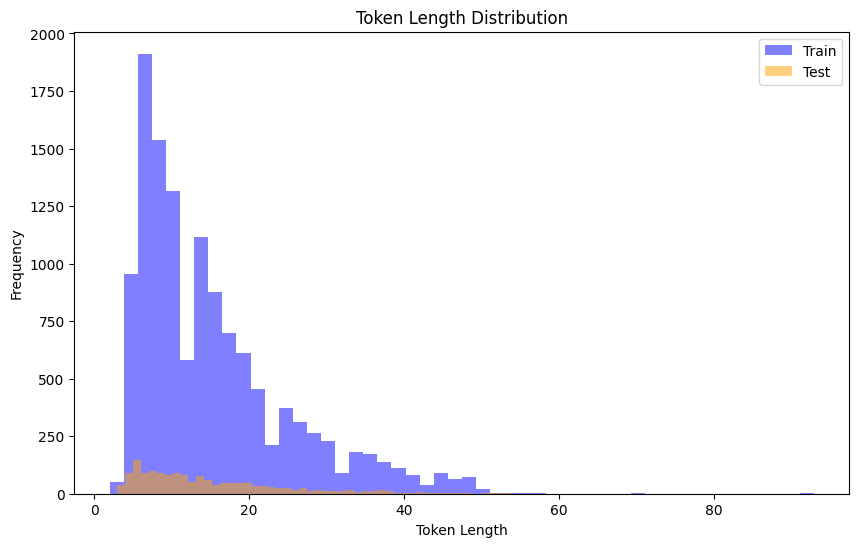

In [41]:
import matplotlib.pyplot as plt

# Calculate token lengths for train and test datasets
train_token_lengths = [len(t.split()) for t in X_train]
test_token_lengths = [len(t.split()) for t in X_test]

# Plot token length distribution
plt.figure(figsize=(10, 6))
plt.hist(train_token_lengths, bins=50, alpha=0.5, color='blue', label='Train')
plt.hist(test_token_lengths, bins=50, alpha=0.5, color='orange', label='Test')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Token Length Distribution')
plt.legend()
plt.show()

In [42]:
model = t.get_classifier()

In [43]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=10)

In [44]:
# Adding early stopping callback from TensorFlow
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='auto')

In [45]:
history = learner.fit_onecycle (2e-5, 10, callbacks=[early_stopping])



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/10
1258/1258 [==============================] - 907s 702ms/step - loss: 0.8633 - accuracy: 0.6176 - val_loss: 0.7176 - val_accuracy: 0.7062
Epoch 2/10
1258/1258 [==============================] - 878s 698ms/step - loss: 0.6573 - accuracy: 0.7296 - val_loss: 0.6632 - val_accuracy: 0.7232
Epoch 3/10
1258/1258 [==============================] - 879s 699ms/step - loss: 0.5452 - accuracy: 0.7864 - val_loss: 0.6653 - val_accuracy: 0.7427
Epoch 4/10
1258/1258 [==============================] - 879s 699ms/step - loss: 0.4232 - accuracy: 0.8402 - val_loss: 0.6969 - val_accuracy: 0.7472
Epoch 5/10
1258/1258 [==============================] - 878s 698ms/step - loss: 0.3156 - accuracy: 0.8897 - val_loss: 0.8711 - val_accuracy: 0.7339
Epoch 6/10
1258/1258 [==============================] - 879s 699ms/step - loss: 0.2272 - accuracy: 0.9256 - val_loss: 0.8545 - val_accuracy: 0.7390
Epoch 7/10
1258/1258 [===========================

In [46]:
# Save the trained model
learner.save_model('/kaggle/output/bemoc.zip')

In [47]:
classes=t.get_classes()

In [48]:
cm = learner.validate(class_names=t.get_classes())

50/50 [==============================] - 9s 101ms/step
              precision    recall  f1-score   support

           0       0.52      0.59      0.55       361
           1       0.83      0.76      0.79       654
           2       0.80      0.80      0.80       571

    accuracy                           0.74      1586
   macro avg       0.72      0.72      0.72      1586
weighted avg       0.75      0.74      0.74      1586

